# Working with TensorFlow Data

We can't build neural nets without data. So, we are going to show you how to work with a collection of datasets built into the Tensorflow environment. The creators of TensorFlow aptly named this collection TensorFlow Datasets.

**TensorFlow Datasets** (TFDS) is a collection of datasets ready to use with TensorFlow. All datasets are exposed as **tf.data.Datasets**, which provides us easy-to-use and high-performance input pipelines.

Enable the GPU (if not already enabled):
1.	click **Runtime** in the top left menu
2.	click **Change runtime type** from the drop-down menu
3.	choose **GPU** from the *Hardware accelerator* drop-down menu
4.	click **SAVE**

Let’s begin by displaying the current version of TensorFlow and enabling the GPU in Google Colab:

In [1]:
import tensorflow as tf

# display tf version and test if GPU is active

tf.__version__, tf.test.gpu_device_name()

('2.3.0', '/device:GPU:0')

# TensorFlow Datasets (TFDS)

We **recommend** perusing the following URLs to find out more about TensorFlow Datasets:

1. https://www.tensorflow.org/datasets

2. https://www.tensorflow.org/datasets/overview

3. https://www.tensorflow.org/datasets/catalog/overview

The first URL is the place to start. It introduces TensorFlow Datasets, which are technically represented as tf.data.Datasets (TFDS). It also provides some simple code to help us get started working with TFDS. Finally, it provides links to other TFDS resources including the second and third URL listed here.

The second URL introduces eager execution, which is enabled automatically in TensorFlow 2.0. It also shows us how to dislay a list of available TFDS datasets and how to load a dataset with one line using **tfds.load**. Additionally, it introduces and applies feature dictionaries, **DatasetBuilder**, pipelines, and **DatasetInfo**. Finally, it shows us how to visualize some examples from a TFDS dataset with one line.

The third URL shows a list of all TFDS datasets and how they are categorized. TFDS datasets are categorized as audio, image, object_detection, structured, summarization, text, translate, and video. Our examles in this chapter will be image datasets MNIST and CIFAR10.

Of course, we cover TFDS well in this chapter. So, you don't have to try and learn from the recommended websites. We just offer them for future reference.

# Colab Abends

As noted in chapter 1, we've noticed that when we run Google Colab for a long time (several hours) without pause or load large datasets into memory and process said data, it has the tendency to crash (or abend). When this happens, you have two choices that we know of:

1. Restart all runtimes.

2. Close the program and restart it from scratch.

To restart all runtimes, click the **Runtime** on the top menu, click **Restart all runtimes...**, and click **Yes** when prompted. Google Colab recommends this option. If we are going to restart from scratch, we clear browser history first and then start Google Colab from scratch.

# Available TFDS

Let's begin by seeing the list of datasets available to us.

In [2]:
import tensorflow_datasets as tfds

# See available datasets

tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

Find out how many TFDS are in the tensorflow_datasets container:

In [3]:
print (str(len(tfds.list_builders())) + ' datasets')

224 datasets


Wow! That's quite a few datasets we can use to practice TensorFlow.

# Load a TFDS

Let's continue by loading a dataset into memory and doing some processing. Luckily, TensorFlow provides a convenient method to load a dataset in one line. The **tfds.load** method is the simplest way to build and load a tf.data.Dataset because it automatically fetches the DatasetBuilder by name, calls download_and_prepare(), and calls as_dataset().

We need the tfds module:

In [4]:
import tensorflow_datasets as tfds

# Building an Input Pipeline

 **tf.data.Dataset** is the standard TensorFlow API to build input pipelines. So, let's begin by building an input pipeline for the MNIST dataset using the tfds.load() method. The **MNIST** database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is *commonly* used for training various image processing systems. The database is also *widely* used for training and testing in the field of machine learning. The database consists of a set of 60,000 training examples, and 10,000 test examples.

Although feed-forward neural nets don't tend to perform well on images, MNIST is an exception because it is heavily preprocessed. That is, MNIST images are roughly of the same size, centered in the middle of the image space, and vertically oriented. In chapter 6, we'll introduce a another class of neural nets that works well with all types of images.

# Load the TFDS into Memory

In [5]:
# load train set

train, info = tfds.load('mnist', split='train', with_info=True)
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [6]:
# load test data

test, info = tfds.load('mnist', split='test', with_info=True)
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

# Extract Useful Information

The *info* element enables extraction of even deeper information. Let's extract information about the classes:

In [7]:
# create a variable to hold a return symbol

br = '\n'

# display number of classes 
num_classes = info.features['label'].num_classes
class_labels = info.features['label'].names

# display class labels
print ('number of classes:', num_classes)
print ('class labels:', class_labels)

number of classes: 10
class labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Inspect the TFDS

The **Dataset.element_spec** property allows you to inspect the type of each element component. Let's compare what is displayed by just printing the training set and using the element_spec method. Both ways are fine, but using the *element_spec* method is the formal approach.

In [8]:
# display training and test set

print (train)
print (test)

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [9]:
# display with element_spec method

print (train.element_spec)
print (test.element_spec)

{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}
{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}


As you can see, the output from both is very similar. Both show the tensor shape as (28, 28, 1). So, the training set tensor consists of 28x28 images. The **1** value means that images are displayed in grayscale.

A **grayscale** image is one where the value of each pixel is a single sample representing only an amount of light. That is, it carries only intensity information. Grayscale images are composed exclusively of shades of gray. The contrast of an image ranges from black at the weakest intensity to white at the strongest.

Both also show that image data (the feature set) is composed of tf.uint8 data and label (or target) data is composed of tf.int64 data. Albeit, they show this information in different ways.

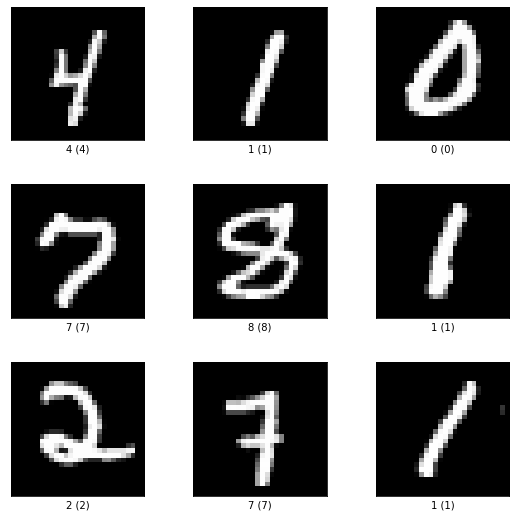

In [10]:
# Show train feature image examples

fig = tfds.show_examples(train, info)

# Feature Dictionaries

All tfds datasets contain **feature dictionaries** mapping feature names to Tensor values. By default, the tf.data.Dataset object contains a dictionary of tf.Tensors. A **tf.Tensor** represents a rectangular array of data.

A typical dataset, like MNIST, has 2 keys: *image* and *label*. Now, let's inspect one example with **take(1)**. The number we feed into the *take()* function renders the number of examples we receive from the dataset.

Take one sample from the train dataset and display its keys:

In [11]:
for sample in train.take(1):
  print(list(sample.keys()))

['image', 'label']


Display the feature shape and target value from the first train sample:

In [12]:
for sample in train.take(1):
  print ('feature shape:', sample['image'].shape)
  print ('target value: ', sample['label'].numpy())

feature shape: (28, 28, 1)
target value:  4


Any dataset consumed by a machine learning algorithm **must** have the same shape. So, we can get the shape of a dataset from a single sample.

Let's get nine examples from the train set:

In [13]:
n, ls = 9, []
for sample in train.take(n):
  ls.append(sample['label'].numpy())
ls

[4, 1, 0, 7, 8, 1, 2, 7, 1]

By using the **as_supervised=True** parameter, we get a tuple of (features, label) instead of a dictionary.

In [14]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in ds:
  print(image.shape, br, label)

(28, 28, 1) 
 tf.Tensor(4, shape=(), dtype=int64)


We can also get a **numpy** tuple of (features, label):

In [15]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
  print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 4


Finally, we can get a **batched** tf.Tensor:

In [16]:
image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='train', 
    batch_size=-1, 
    as_supervised=True,
))

type(image), image.shape

(numpy.ndarray, (60000, 28, 28, 1))

By using *batch_size=-1*, we load the full dataset in a single batch. *tfds.load* returns a dictionary by default, a tuple with *as_supervised=True* of *tf.Tensor* or a *np.array* with *tfds.as_numpy*.

Be careful that your dataset can fit in memory, and that all examples have the same shape.

# Construct the Input Pipeline

Scale, shuffle, batch, and prefetch train data:

In [17]:
batch_size, shuffle_size = 32, 10000

train_sc = train.map(lambda items:\
                     (tf.cast(items['image'],\
                              tf.float32) / 255.,\
                      items['label']))

train_ds = train_sc.shuffle(shuffle_size).batch(batch_size).prefetch(1)

Scale, batch, and prefetch test data:

In [18]:
test_sc = test.map(lambda items:\
                   (tf.cast(items['image'],\
                            tf.float32) / 255.,\
                    items['label']))

test_ds = test_sc.batch(batch_size).prefetch(1)

Inspect tensors:

In [19]:
train_ds, test_ds

(<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>)

# Build the Model

Import libraries:

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

Create the model:

In [21]:
# clear previous model
tf.keras.backend.clear_session()

model = Sequential([
  Flatten(input_shape=[28, 28, 1]),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])

# Model Summary

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [24]:
epochs = 3
history = model.fit(train_ds, epochs=epochs, verbose=1,
                     validation_data=test_ds)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2029 - accuracy: 0.9395 - val_loss: 0.1081 - val_accuracy: 0.9668
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0801 - accuracy: 0.9758 - val_loss: 0.0746 - val_accuracy: 0.9766
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0528 - accuracy: 0.9830 - val_loss: 0.0775 - val_accuracy: 0.9756


# Generalize on Test Data

In [25]:
model.evaluate(test_ds)

313/313 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9756


[0.07752583920955658, 0.975600004196167]

# Visualize Performance

In [26]:
# get training record into a variable

history_dict = history.history

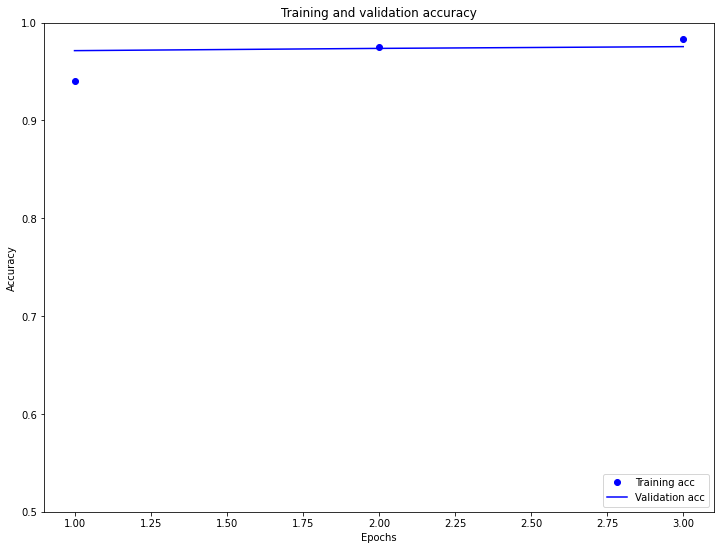

<Figure size 432x288 with 0 Axes>

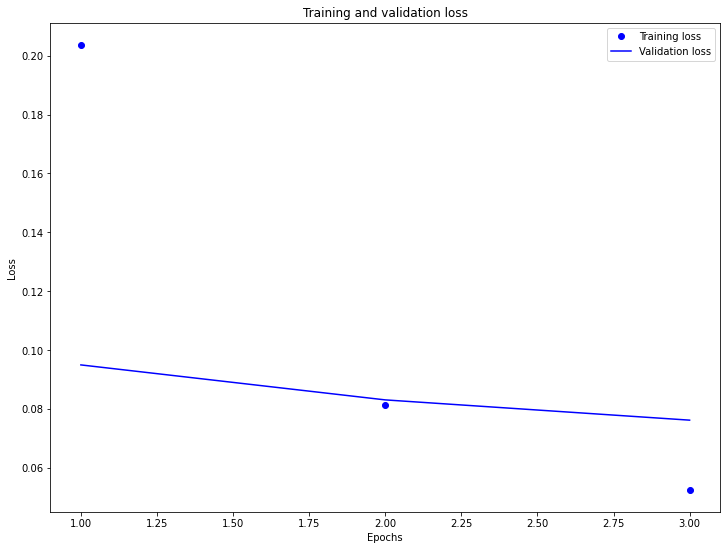

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

# clear previous figure

plt.clf()

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# DatasetBuilder (tfds.builder)

Since tfds.load is really just a thin conveninence wrapper around DatasetBuilder, we can build an input pipeline with the MNIST dataset directly with **tfds.builder**. Unlike tfds.load, however, we have to manually fetch the DatasetBuilder by name, call download_and_prepare(), and call as_dataset(). The advantage of tfds.builder is that it allows more control over the loading process should we need it.

In [27]:
mnist_builder = tfds.builder('mnist')
mnist_info = mnist_builder.info
mnist_builder.download_and_prepare()
datasets = mnist_builder.as_dataset()

Build the training and test set:

In [28]:
mnist_train, mnist_test = datasets['train'], datasets['test']

We can also use the feature dictionary just as before:

In [29]:
for sample in mnist_train.take(1):
  print ('feature shape:', sample['image'].shape)
  print ('target value: ', sample['label'].numpy())

feature shape: (28, 28, 1)
target value:  4


# MNIST Metadata

After generation, the builder contains useful information on the dataset with the **info** method:

In [30]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

Wow! The **info** method gives us a lot of information! We get the name of the dataset, version, description, URL where its stored, image and label tensor information, number of examples in the dataset, number of test and train examples, keys, and citation information.

Since we already knew the tensor shape, the key information for our purposes is total_num_examples and splits. So, MNIST contains 70000 examples with test split of 10000 and train split of 60000 examples.

Access features:

In [31]:
mnist_info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

Get the number of classes and class labels:

In [32]:
# create a variable to hold a return symbol

br = '\n'

# display number of classes 
num_classes = mnist_info.features['label'].num_classes
class_labels = mnist_info.features['label'].names

# display class labels
print ('number of classes:', num_classes)
print ('class labels:', class_labels)

number of classes: 10
class labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Shapes and datatypes:

In [33]:
print (mnist_info.features.shape)
print (mnist_info.features.dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}


Image information:

In [34]:
print (mnist_info.features['image'].shape)
print (mnist_info.features['image'].dtype)

(28, 28, 1)
<dtype: 'uint8'>


Label information:

In [35]:
print (mnist_info.features['label'].shape)
print (mnist_info.features['label'].dtype)

()
<dtype: 'int64'>


Show train and test splits:

In [36]:
print (mnist_info.splits)

{'test': <tfds.core.SplitInfo num_examples=10000>, 'train': <tfds.core.SplitInfo num_examples=60000>}


Show available split keys:

In [37]:
print (list(mnist_info.splits.keys()))

['test', 'train']


Number of train and test examples:

In [38]:
print (mnist_info.splits['train'].num_examples)
print (mnist_info.splits['test'].num_examples)

60000
10000


# tfds.show_examples

**tfds.show_examples()** allows us to conveniently visualize images (and labels) from an image classification dataset. To use this method, we need the dataset and information about the dataset. Since we just created variable *info* with method **info** from tfds.builder, we can show some examples.

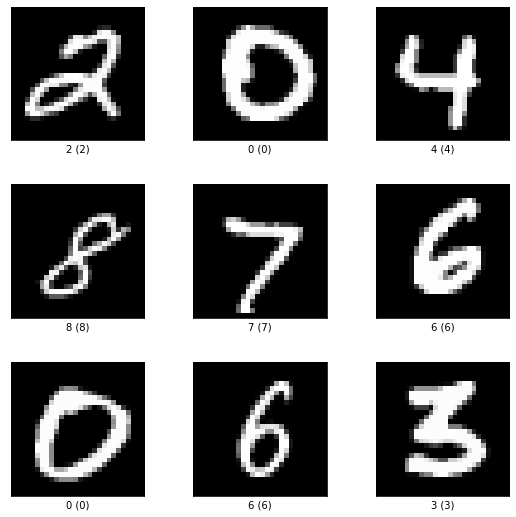

In [39]:
fig = tfds.show_examples(mnist_test, info)

# Model DatasetBuilder Data

Now that we have explored the DatasetBuilder dataset, we can model it.

## Prepare the Input Pipeline

Scale, shuffle, batch, prefetch train data:

In [40]:
train_sc = mnist_train.map(lambda items:\
                           (tf.cast(items['image'],\
                                    tf.float32) / 255.,\
                            items['label']))

train_build = train_sc.shuffle(1024).batch(128).prefetch(1)

Scale, batch, and prefetch test data:

In [41]:
test_sc = mnist_test.map(lambda items:\
                         (tf.cast(items['image'],\
                                  tf.float32) / 255.,\
                          items['label']))

test_build = test_sc.batch(128).prefetch(1)

Inspect tensors:

In [42]:
train_build, test_build

(<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>)

## Build the Model

In [43]:
tf.keras.backend.clear_session()

model = Sequential([
  Flatten(input_shape=[28, 28, 1]),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])

## Compile the Model

In [44]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the Model

In [45]:
model.fit(train_build, epochs=3, validation_data=test_build)

Epoch 1/3
469/469 [==============================] - 8s 16ms/step - loss: 0.2658 - accuracy: 0.9243 - val_loss: 0.1322 - val_accuracy: 0.9611
Epoch 2/3
469/469 [==============================] - 2s 5ms/step - loss: 0.1093 - accuracy: 0.9686 - val_loss: 0.0985 - val_accuracy: 0.9709
Epoch 3/3
469/469 [==============================] - 2s 5ms/step - loss: 0.0710 - accuracy: 0.9794 - val_loss: 0.0787 - val_accuracy: 0.9759


Evaluate the model:

In [47]:
model.evaluate(test_build)

79/79 [==============================] - 0s 6ms/step - loss: 0.0787 - accuracy: 0.9759


[0.07870370149612427, 0.9758999943733215]

# Load a different TFDS

Let's use DatasetBuilder (tfds.builder) to manipulate another dataset and show some examples. The **CIFAR-10 dataset** consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The ten classes are:

**[airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck]**

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. 'Automobile' includes sedans, SUVs, things of that sort. 'Truck' includes only big trucks. Neither includes pickup trucks.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. Since CIFAR10 is preprocessed with batches, we can use this information to better batch data for the training model.

In [48]:
cifar10_builder = tfds.builder('cifar10')
cifar10_info = cifar10_builder.info
cifar10_builder.download_and_prepare()
cifar10_train = cifar10_builder.as_dataset(split='train')
cifar10_test = cifar10_builder.as_dataset(split='test')

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteFGZMYV/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteFGZMYV/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


Let's see what the tensors look like:

In [49]:
cifar10_train

<PrefetchDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>

We can see that the training set tensor consists of 32x32 images. The **3** value means that images are displayed in color.

The RGB color model is an additive color model where red, green, and blue light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, namely, red, green, and blue. Since color images are created with three colors, the **3** value is used as the third parameter for the tensor!    

From the tensor displays, we can see that image data (the feature set) is composed of tf.uint8 data and label (or target) data is composed of tf.int64 data.

## View Information about the Data

We can also use **DatasetBuilder** to display information about CIFAR10 with the **info** method:

In [50]:
cifar10_info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

The description in this case is very informative because it tells us that CIFAR10 contains 60000 32x32 color images in 10 classes. It also tells us that there are 6000 images per class and 50000 training images and 10000 test images. But, we can't always count on the description being so informative because the MNIST description didn't tell us any information about what the dataset contained.

Display the classes:

In [51]:
cifar10_info.features['label'].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Show Some Examples from the Train Data

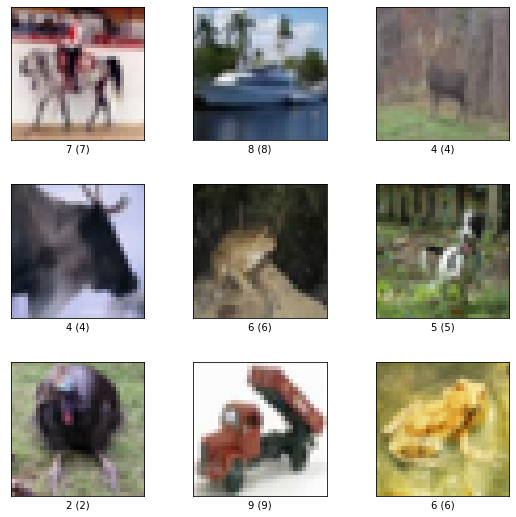

In [52]:
fig = tfds.show_examples(cifar10_train, info)

Use the feature dictionary to display train labels:

In [53]:
[sample['label'].numpy() for sample in cifar10_train.take(9)]

[7, 8, 4, 4, 6, 5, 2, 9, 6]

Display test samples:

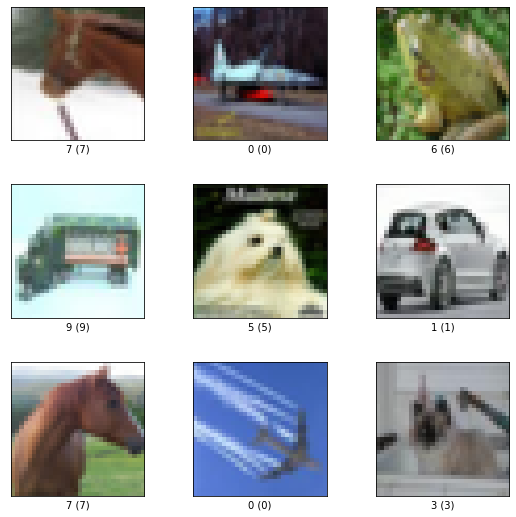

In [54]:
fig = tfds.show_examples(cifar10_test, info)

# Prepare the Input Pipeline

Scale, shuffle, batch, and prefetch train data:

In [55]:
train_sc = cifar10_train.map(lambda items:\
                             (tf.cast(items['image'],\
                                      tf.float32) / 255.,\
                              items['label']))

train_cd = train_sc.shuffle(1024).batch(128).prefetch(1)

Scale, batch, and prefetch test data:

In [56]:
test_sc = cifar10_test.map(lambda items:\
                           (tf.cast(items['image'],\
                                    tf.float32) / 255.,\
                            items['label']))

test_cd = test_sc.batch(128).prefetch(1)

Inspect tensors:

In [57]:
train_cd, test_cd

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>)

# Build the Model

In [58]:
# clear previous model
tf.keras.backend.clear_session()

model = Sequential([
  Flatten(input_shape=[32, 32, 3]),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])

We **must** get the input shape correct. For CIFAR10, the input shape is (32, 32, 3).

# Model Summary

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [61]:
epochs = 3
history = model.fit(train_cd, epochs=epochs, verbose=1,
                    validation_data=test_cd)

Epoch 1/3
391/391 [==============================] - 9s 24ms/step - loss: 2.0169 - accuracy: 0.3004 - val_loss: 1.7870 - val_accuracy: 0.3726
Epoch 2/3
391/391 [==============================] - 3s 7ms/step - loss: 1.7570 - accuracy: 0.3778 - val_loss: 1.7360 - val_accuracy: 0.3791
Epoch 3/3
391/391 [==============================] - 3s 7ms/step - loss: 1.6838 - accuracy: 0.4039 - val_loss: 1.6717 - val_accuracy: 0.4003
